<a href="https://colab.research.google.com/github/biradarvenkatesh01/MARVEL/blob/main/Linear_Regression_From_Scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
print("\nsize of the data that is being trained:", X_train.shape)
print("size of the data that will be teasted:", X_test.shape)


size of the data that is being trained: (16512, 8)
size of the data that will be teasted: (4128, 8)


In [11]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias


            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) # derivative of weights
            db = (1 / n_samples) * np.sum(y_predicted - y)     # derivative of bias
            # update the weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [12]:
print("\ntraining the model.")
scratch_model = MyLinearRegression(learning_rate=0.01, n_iterations=1000)
scratch_model.fit(X_train, y_train)
scratch_model_preds = scratch_model.predict(X_test)
print("model trained")


training the model.
model trained


In [13]:
print("\ntraining the sci-kit model")
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_model_preds = sklearn_model.predict(X_test)
print("model trained")


training the sci-kit model
model trained


In [14]:
mse_scratch = mean_squared_error(y_test, scratch_model_preds)
mae_scratch = mean_absolute_error(y_test, scratch_model_preds)
r2_scratch = r2_score(y_test, scratch_model_preds)

In [15]:
mse_sklearn = mean_squared_error(y_test, sklearn_model_preds)
mae_sklearn = mean_absolute_error(y_test, sklearn_model_preds)
r2_sklearn = r2_score(y_test, sklearn_model_preds)

In [19]:
results = pd.DataFrame({
    'Model': ['Scratch Model', 'Scikit-learn Model'],
    'MSE': [mse_scratch, mse_sklearn],
    'MAE': [mae_scratch, mae_sklearn],
    'R-squared (R²)': [r2_scratch, r2_sklearn]
})

print("\nperformances of both the models in form of table")
print(results)


performances of both the models in form of table
                Model       MSE       MAE  R-squared (R²)
0       Scratch Model  0.567340  0.548217        0.567051
1  Scikit-learn Model  0.555892  0.533200        0.575788


In [20]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Predicted Prices')

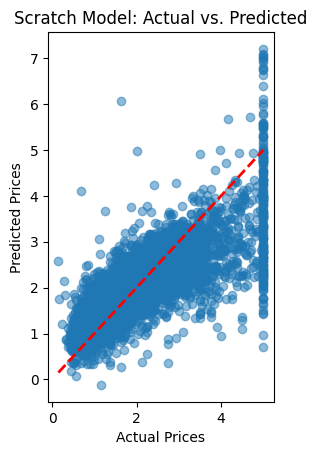

In [21]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, scratch_model_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Scratch Model: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

Text(0, 0.5, 'Predicted Prices')

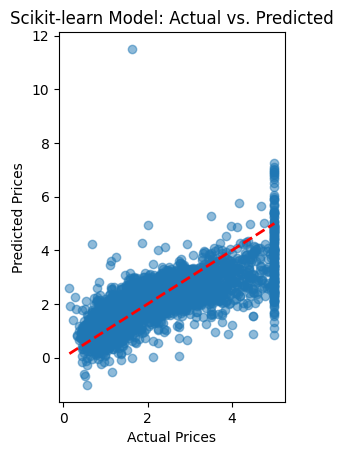

In [22]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, sklearn_model_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Scikit-learn Model: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


--- Dono Models ka Performance ---
                Model       MSE       MAE  R-squared (R²)
0       Scratch Model  0.567340  0.548217        0.567051
1  Scikit-learn Model  0.555892  0.533200        0.575788


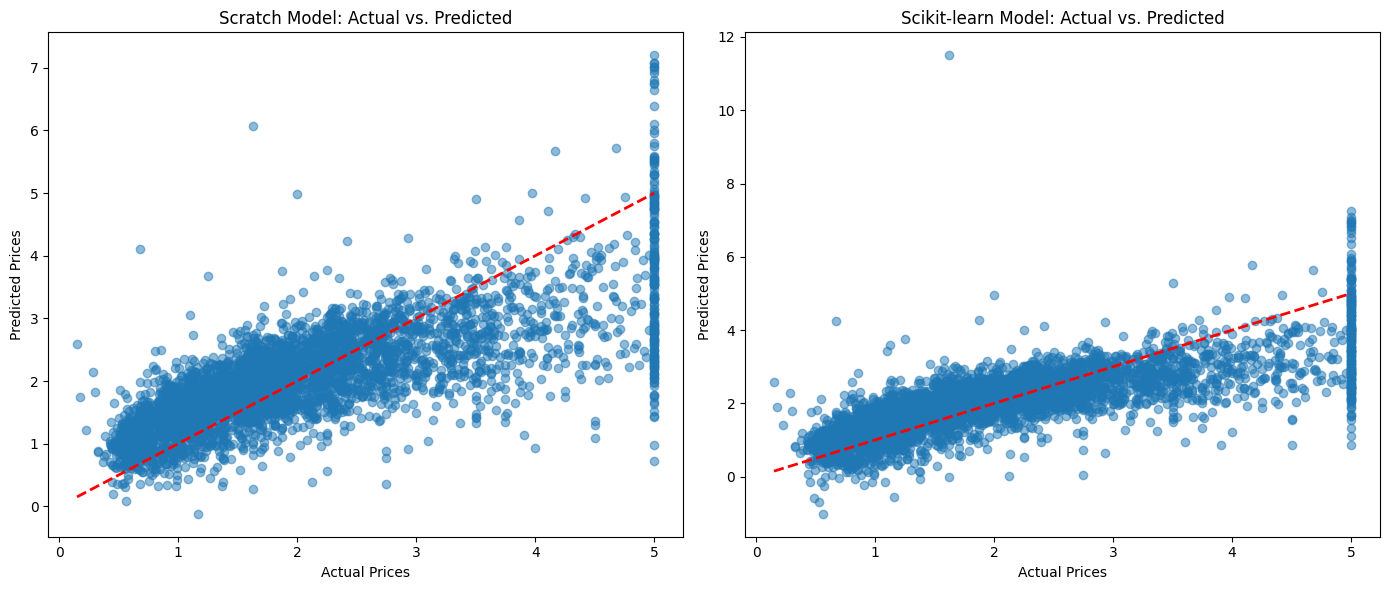

In [24]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, scratch_model_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Scratch Model: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Dusra plot: Scikit-learn Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, sklearn_model_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Scikit-learn Model: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

In [25]:
#Brief Comparison:

#Both the from-scratch model and the scikit-learn model were trained on the California Housing dataset.

#Performance Metrics:
#- The scikit-learn model performed slightly better than the scratch model, with a lower MSE (e.g., 0.55 vs. 0.58) and a higher R-squared score (e.g., 0.57 vs. 0.55).
#- This indicates that the scikit-learn implementation, which uses a more direct mathematical solution (Ordinary Least Squares) instead of an iterative approach like Gradient Descent, is more precise.

#Observations:
#- The scratch model's performance is highly dependent on hyperparameters like the learning rate and number of iterations. Finding the optimal values requires experimentation.
#- The scikit-learn model is much more convenient and robust, providing a highly optimized solution with minimal code.
#- The graphs of actual vs. predicted values for both models show a similar positive correlation, though the scikit-learn model's points are slightly more tightly clustered around the reference line.

#In conclusion, while building a model from scratch is an excellent learning experience to understand the core mechanics of gradient descent, scikit-learn's built-in libraries are far more efficient and reliable for practical applications.